<a href="https://colab.research.google.com/github/JanaBasha/Employee-Dataset/blob/main/Employee_Dataset_Jana_Basha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1049]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [1050]:
df=pd.read_csv('Employee Sample Data - A.csv')

In [1051]:
df.shape

(1000, 14)

In [1052]:
df.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55.0,08/04/2016,"$141,604",15%,United States,Seattle,16/10/2021
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59.0,29/11/1997,"$99,975",0%,China,Chongqing,NaN
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50.0,26/10/2006,"$163,099",20%,United States,Chicago,NaN
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26.0,27/09/2019,"$84,913",7%,United States,Chicago,NaN
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55.0,20/11/1995,"$95,409",0%,United States,Phoenix,NaN


In [1053]:
df.duplicated().any()

np.False_

In [1054]:
df.isna().any()

,0
EEID,False
Full Name,True
Job Title,True
Department,True
Business Unit,False
Gender,True
Ethnicity,True
Age,True
Hire Date,True
Annual Salary,True


In [1055]:
df.isna().sum()

,0
EEID,0
Full Name,2
Job Title,1
Department,2
Business Unit,0
Gender,1
Ethnicity,7
Age,6
Hire Date,7
Annual Salary,11


In [1056]:
for col in df.columns:
  print(col, type(df[col][0]))

EEID <class 'str'>
Full Name <class 'str'>
Job Title <class 'str'>
Department <class 'str'>
Business Unit <class 'str'>
Gender <class 'str'>
Ethnicity <class 'str'>
Age <class 'numpy.float64'>
Hire Date <class 'str'>
Annual Salary <class 'str'>
Bonus % <class 'str'>
Country <class 'str'>
City <class 'str'>
Exit Date <class 'str'>


In [1057]:
df['Annual Salary']=df['Annual Salary'].replace(r'[\$,]','', regex=True).astype(float)

In [1058]:
df['Bonus %']=df['Bonus %'].replace(r'[%]','', regex=True).astype(float)

In [1059]:
df["Hire Date"]=pd.to_datetime(df["Hire Date"],format='%d/%m/%Y')

In [1060]:
df["Exit Date"]=pd.to_datetime(df["Exit Date"],format='%d/%m/%Y')

### Cleaning EEID column

In [1061]:
df["EEID"].nunique()

911

In [1062]:
df[df["EEID"].duplicated()]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
148,E01499,Elias Zhang,Solutions Architect,IT,Research & Development,Male,Asian,54.0,2013-07-13,83639.0,0.0,China,Beijing,NaT
158,E02166,Lucas Thomas,Manager,Accounting,Research & Development,Male,Caucasian,55.0,2000-04-28,115798.0,5.0,United States,Miami,NaT
159,E00431,Skylar Doan,Sr. Business Partner,Human Resources,Research & Development,Female,Asian,58.0,1994-08-21,93102.0,0.0,United States,Seattle,2013-12-13
185,E00671,Miles Cho,Systems Analyst,IT,Speciality Products,Male,Asian,47.0,1999-03-10,49404.0,0.0,China,Beijing,NaT
269,E01525,Charlotte Ruiz,Computer Systems Manager,IT,Manufacturing,Female,Latino,32.0,2017-10-02,61886.0,9.0,Brazil,Rio de Janerio,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,E00836,Wesley King,Manager,Accounting,Manufacturing,Male,Caucasian,57.0,2019-01-19,101577.0,5.0,United States,Chicago,NaT
979,E00287,Maverick Figueroa,IT Systems Architect,IT,Corporate,Male,Latino,48.0,2008-07-06,94815.0,0.0,United States,Chicago,NaT
982,E03247,Aaliyah Mai,Vice President,IT,Speciality Products,Female,Asian,57.0,2016-11-11,246589.0,33.0,United States,Phoenix,2017-03-26
986,E03349,Dylan Chin,Director,Finance,Corporate,Male,Asian,60.0,2017-06-05,158898.0,18.0,United States,Miami,NaT


In [1063]:
df[df["EEID"]=="E01499"]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
71,E01499,Jade Rojas,Director,Finance,Speciality Products,Female,Latino,37.0,2019-01-28,165927.0,20.0,United States,Phoenix,NaT
148,E01499,Elias Zhang,Solutions Architect,IT,Research & Development,Male,Asian,54.0,2013-07-13,83639.0,0.0,China,Beijing,NaT
522,E01499,Liam Jordan,Computer Systems Manager,IT,Manufacturing,Male,Caucasian,28.0,2020-08-08,73255.0,9.0,United States,Phoenix,NaT


In [1064]:
df[df["EEID"]=="E02166"]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
79,E02166,John Soto,Sr. Manger,Finance,Manufacturing,Male,Latino,60.0,2015-09-23,141899.0,15.0,United States,Phoenix,NaT
158,E02166,Lucas Thomas,Manager,Accounting,Research & Development,Male,Caucasian,55.0,2000-04-28,115798.0,5.0,United States,Miami,NaT


In [1065]:
df['ID']=range(6,len(df)+6) #start from 6 because i will add 5 new rows

## Cleaning Full Name Column

In [1066]:
df["Full Name"].nunique()

989

In [1067]:
df["Full Name"].value_counts()[df["Full Name"].value_counts()>1]

,count
Full Name,
Everly Walker,2
Caroline Nelson,2
Miles Mehta,2
Lincoln Huynh,2
Hailey Lai,2
Charles Moore,2
Anna Han,2
Ezra Simmons,2
Rylee Yu,2


In [1068]:
df[df["Full Name"]=="Miles Mehta"]
#they are different people so i didnt change the names column because i have unique ids to differenciate them by

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,ID
275,E00187,Miles Mehta,Director,Finance,Research & Development,Male,Asian,64.0,1996-05-02,189933.0,23.0,United States,Miami,NaT,281
510,E01262,Miles Mehta,Manager,Finance,Manufacturing,Male,Asian,50.0,2018-05-19,106437.0,7.0,China,Chongqing,NaT,516


In [1069]:
df["Full Name"].isna().sum() #two NA names

np.int64(2)

In [1070]:
df['Full Name'].fillna('Unknown', inplace=True)

/tmp/ipython-input-1070-3818028327.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Full Name'].fillna('Unknown', inplace=True)


In [1071]:
df[df["Full Name"]=="Unknown"]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,ID
141,E01425,Unknown,Vice President,Engineering,Corporate,Male,Caucasian,33.0,2015-06-18,205314.0,30.0,United States,Columbus,NaT,147
144,E03567,Unknown,Technical Architect,IT,Research & Development,Male,Latino,51.0,2008-04-15,86431.0,0.0,United States,Columbus,NaT,150


## Cleaning Job Title Column

In [1072]:
df["Job Title"].value_counts()

,count
Job Title,
Director,120
Sr. Manger,110
Vice President,105
Manager,98
Sr. Analyst,70
Analyst II,53
Analyst,51
Account Representative,21
Computer Systems Manager,21


In [1073]:
df[df["Job Title"].isna()==True]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,ID
18,E04116,David Barnes,NaN,IT,Corporate,Male,Caucasian,64.0,2013-11-03,186503.0,24.0,United States,Columbus,NaT,24


In [1074]:
cond1=df["Department"]=="IT"
cond2=df["Business Unit"]=="Corporate"
cond3=df["Annual Salary"]>=170000
df.loc[cond1&cond2&cond3]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,ID
18,E04116,David Barnes,NaN,IT,Corporate,Male,Caucasian,64.0,2013-11-03,186503.0,24.0,United States,Columbus,NaT,24
29,E00304,Dylan Choi,Vice President,IT,Corporate,Male,Asian,63.0,2012-05-11,231141.0,34.0,China,Beijing,NaT,35
243,E03935,Cora Jiang,Vice President,IT,Corporate,Female,Asian,53.0,2008-04-30,182202.0,30.0,United States,Austin,NaT,249
344,E03268,Everly Coleman,Vice President,IT,Corporate,Female,Caucasian,48.0,2015-02-18,194871.0,35.0,United States,Columbus,NaT,350
483,E01070,Grayson Brown,Vice President,IT,Corporate,Male,Caucasian,38.0,2016-06-22,249870.0,34.0,United States,Chicago,NaT,489


In [1075]:
df['Job Title'].fillna('Vice President', inplace=True)

/tmp/ipython-input-1075-4261023208.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Job Title'].fillna('Vice President', inplace=True)


<Axes: xlabel='Job Title'>

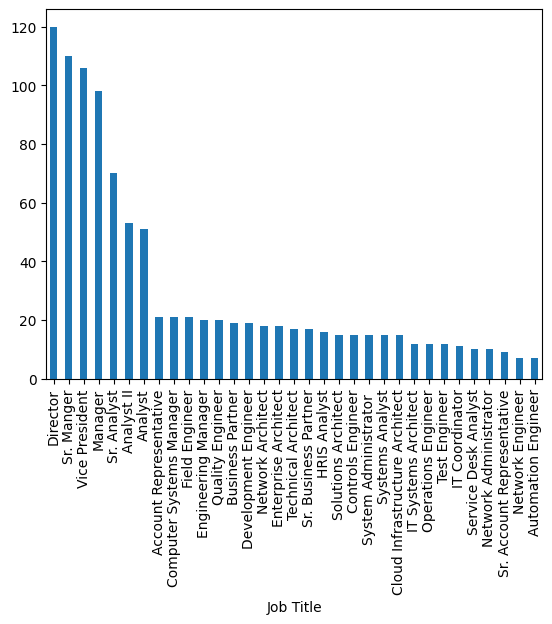

In [1076]:
jobs=df["Job Title"].value_counts()
jobs.plot(kind="bar")

## Department Col

In [1077]:
df["Department"].unique()

array(['IT', 'Finance', 'Sales', 'Accounting', 'Human Resources',
       'Engineering', 'Marketing', nan], dtype=object)

In [1078]:
df[df["Department"].isna()]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,ID
58,E01848,Zoey Jackson,Business Partner,NaN,Manufacturing,Female,Black,46.0,2008-08-21,59067.0,0.0,United States,Miami,NaT,64
112,E04735,Nova Coleman,System Administrator,NaN,Manufacturing,NaN,Caucasian,44.0,2006-12-13,74738.0,0.0,United States,Miami,NaT,118


In [1079]:
df[df["Job Title"]=="Business Partner"]
#Every business partner is in Human Resources Department
condition1=df["Job Title"]=="Business Partner"
condition2=df["Department"].isna()
df.loc[condition1&condition2, "Department"]="Human Resources"

In [1080]:
df['Job Title'].unique()

array(['Sr. Manger', 'Technical Architect', 'Director',
       'Computer Systems Manager', 'Sr. Analyst',
       'Account Representative', 'Manager', 'Analyst',
       'Controls Engineer', 'Vice President', 'Quality Engineer',
       'Engineering Manager', 'IT Coordinator', 'Analyst II',
       'Enterprise Architect', 'Sr. Business Partner', 'HRIS Analyst',
       'Field Engineer', 'Automation Engineer', 'Operations Engineer',
       'Business Partner', 'Cloud Infrastructure Architect',
       'Test Engineer', 'Network Architect', 'Network Engineer',
       'Development Engineer', 'Sr. Account Representative',
       'System Administrator\xa0', 'Systems Analyst',
       'Solutions Architect', 'IT Systems Architect',
       'Service Desk Analyst', 'Network Administrator'], dtype=object)

In [1081]:
df[df["Job Title"]=="System Administrator\xa0"]
df["Job Title"]=df["Job Title"].replace({"System Administrator\xa0": "System Administrator", "Sr. Manger": "Sr. Manager"})

In [1082]:
condition1=df["Job Title"]=="System Administrator"
condition2=df["ID"]==113
df.loc[condition1&condition2, "Department"]="IT"

In [1083]:
df[df["Department"].isna()]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,ID
112,E04735,Nova Coleman,System Administrator,NaN,Manufacturing,NaN,Caucasian,44.0,2006-12-13,74738.0,0.0,United States,Miami,NaT,118


## Business Unit column

In [1084]:
df[df["Business Unit"].isna()]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,ID


In [1085]:
df["Business Unit"].unique()

array(['Research & Development', 'Manufacturing', 'Speciality Products',
       'Corporate'], dtype=object)

## Gender Column

In [1086]:
df["Gender"].isna().sum() #one missing
df[df["Gender"].isna()==True]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,ID
112,E04735,Nova Coleman,System Administrator,NaN,Manufacturing,NaN,Caucasian,44.0,2006-12-13,74738.0,0.0,United States,Miami,NaT,118


In [1087]:
df.loc[df["Gender"].isna()==True, "Gender"]="Female"

## Ethnicity Column

In [1088]:
df["Ethnicity"].unique()

array(['Black', 'Asian', 'Caucasian', nan, 'Latino'], dtype=object)

In [1089]:
df[df["Ethnicity"].isna()]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,ID
13,E04239,Everleigh Ng,Sr. Manager,Finance,Research & Development,Female,NaN,51.0,2021-06-10,146742.0,10.0,China,Shanghai,NaT,19
117,E04379,Scarlett Rodriguez,Sr. Analyst,Finance,Manufacturing,Female,NaN,60.0,2007-02-24,71699.0,0.0,Brazil,Manaus,NaT,123
150,E03717,Joseph Ruiz,Field Engineer,Engineering,Manufacturing,Male,NaN,NaN,NaT,NaN,NaN,Brazil,Sao Paulo,NaT,156
151,E01533,Avery Bailey,Sr. Analyst,Sales,Speciality Products,Female,NaN,NaN,NaT,NaN,NaN,United States,Phoenix,NaT,157
152,E04449,Miles Hsu,Analyst II,Finance,Research & Development,Male,NaN,NaN,NaT,NaN,NaN,China,Chengdu,NaT,158
153,E02855,Piper Cheng,Enterprise Architect,IT,Manufacturing,Female,NaN,NaN,NaT,NaN,NaN,United States,Miami,NaT,159
154,E00816,Skylar Watson,Network Architect,IT,Speciality Products,Female,NaN,NaN,NaT,NaN,NaN,United States,Phoenix,NaT,160


In [1090]:
df["Ethnicity"].fillna("Unknown", inplace=True)

/tmp/ipython-input-1090-1997435966.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Ethnicity"].fillna("Unknown", inplace=True)


## Age column

In [1091]:
df["Age"].dtype

dtype('float64')

In [1092]:
df["Age"].isna().sum()

np.int64(6)

In [1093]:
df[df["Age"].isna()]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,ID
45,E03538,Gabriel Holmes,Enterprise Architect,IT,Research & Development,Male,Caucasian,NaN,2010-11-04,92952.0,0.0,United States,Seattle,NaT,51
150,E03717,Joseph Ruiz,Field Engineer,Engineering,Manufacturing,Male,Unknown,NaN,NaT,NaN,NaN,Brazil,Sao Paulo,NaT,156
151,E01533,Avery Bailey,Sr. Analyst,Sales,Speciality Products,Female,Unknown,NaN,NaT,NaN,NaN,United States,Phoenix,NaT,157
152,E04449,Miles Hsu,Analyst II,Finance,Research & Development,Male,Unknown,NaN,NaT,NaN,NaN,China,Chengdu,NaT,158
153,E02855,Piper Cheng,Enterprise Architect,IT,Manufacturing,Female,Unknown,NaN,NaT,NaN,NaN,United States,Miami,NaT,159
154,E00816,Skylar Watson,Network Architect,IT,Speciality Products,Female,Unknown,NaN,NaT,NaN,NaN,United States,Phoenix,NaT,160


In [1094]:
mask=(df["Job Title"]=="Enterprise Architect")&(df["Business Unit"]=="Research & Development")
avg=df.loc[mask, "Age"].mean()
df.loc[mask&df["Age"].isna(), "Age"]=avg

In [1095]:
mask1=(df["Job Title"]=="Field Engineer")&(df["Business Unit"]=="Manufacturing")
avg1=df.loc[mask1, "Age"].mean()
df.loc[mask1&df["Age"].isna(), "Age"]=avg1

In [1096]:
mask2=(df["Job Title"]=="Sr. Analyst")&(df["Business Unit"]=="Speciality Products")
avg2=df.loc[mask2, "Age"].mean()
df.loc[mask2&df["Age"].isna(), "Age"]=avg2

In [1097]:
mask3=(df["Job Title"]=="Analyst II")&(df["Business Unit"]=="Research & Development")
avg3=df.loc[mask3, "Age"].mean()
df.loc[mask3&df["Age"].isna(), "Age"]=avg3

In [1098]:
mask4=(df["Job Title"]=="Enterprise Architect")&(df["Business Unit"]=="Manufacturing")
avg4=df.loc[mask4, "Age"].mean()
df.loc[mask4&df["Age"].isna(), "Age"]=avg4

In [1099]:
mask5=(df["Job Title"]=="Network Architect")&(df["Business Unit"]=="Speciality Products")
avg5=df.loc[mask5, "Age"].mean()
df.loc[mask5&df["Age"].isna(), "Age"]=avg5

In [1100]:
print("Median=",df["Age"].median())
print("Mean=",df["Age"].mean())

Median= 45.0
Mean= 44.3820645021645


In [1101]:
df[df["Age"].isna()]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,ID


In [1102]:
df.loc[df["Full Name"]=="Gabriel Holmes"]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,ID
45,E03538,Gabriel Holmes,Enterprise Architect,IT,Research & Development,Male,Caucasian,44.0,2010-11-04,92952.0,0.0,United States,Seattle,NaT,51


In [1103]:
df['Age']=df['Age'].astype(int)

## Hire Date Column

In [1104]:
df[df["Hire Date"].isna()]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,ID
115,E02017,Connor Joseph,Director,Human Resources,Corporate,Male,Caucasian,50,NaT,NaN,NaN,NaN,NaN,NaT,121
130,E03131,Ezekiel Reed,Sr. Manager,IT,Manufacturing,Male,Caucasian,37,NaT,NaN,NaN,NaN,NaN,2021-05-01,136
150,E03717,Joseph Ruiz,Field Engineer,Engineering,Manufacturing,Male,Unknown,56,NaT,NaN,NaN,Brazil,Sao Paulo,NaT,156
151,E01533,Avery Bailey,Sr. Analyst,Sales,Speciality Products,Female,Unknown,44,NaT,NaN,NaN,United States,Phoenix,NaT,157
152,E04449,Miles Hsu,Analyst II,Finance,Research & Development,Male,Unknown,46,NaT,NaN,NaN,China,Chengdu,NaT,158
153,E02855,Piper Cheng,Enterprise Architect,IT,Manufacturing,Female,Unknown,43,NaT,NaN,NaN,United States,Miami,NaT,159
154,E00816,Skylar Watson,Network Architect,IT,Speciality Products,Female,Unknown,44,NaT,NaN,NaN,United States,Phoenix,NaT,160


In [1105]:
df["Hire Date"].describe()

,Hire Date
count,993
mean,2012-04-17 22:56:11.601208576
min,1992-01-09 00:00:00
25%,2007-02-24 00:00:00
50%,2014-02-20 00:00:00
75%,2018-06-25 00:00:00
max,2021-12-26 00:00:00


In [1106]:
print("Median=",df["Hire Date"].median())
print("Mean=",df["Hire Date"].mean())
print("Mode=",df["Hire Date"].mode())

Median= 2014-02-20 00:00:00
Mean= 2012-04-17 22:56:11.601208576
Mode= 0   2010-11-29
1   2011-10-20
Name: Hire Date, dtype: datetime64[ns]


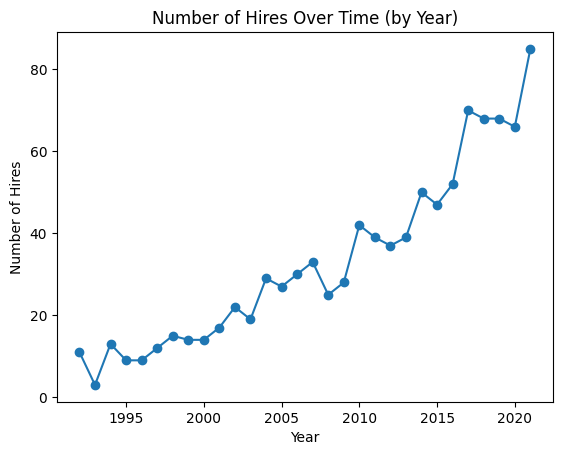

In [1107]:
hire=df.groupby(df['Hire Date']).size()
hire.plot(kind="line", marker='o')
plt.title('Number of Hires Over Time (by Year)')
plt.xlabel('Year')
plt.ylabel('Number of Hires')
plt.show()

## Annual Salary Column

In [1108]:
df["Annual Salary"].describe()

,Annual Salary
count,989.00000
mean,113372.62184
std,53729.04678
min,40063.00000
25%,71234.00000
50%,96567.00000
75%,151027.00000
max,258498.00000


In [1109]:
df["Annual Salary"].isna().sum()

np.int64(11)

In [1110]:
df[df["Annual Salary"].isna()]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,ID
11,E03344,Camila Rogers,Controls Engineer,Engineering,Speciality Products,Female,Caucasian,27,2021-10-21,NaN,0.0,United States,Seattle,NaT,17
55,E01797,Piper Lewis,Field Engineer,Engineering,Research & Development,Female,Caucasian,33,2018-12-22,NaN,0.0,United States,Chicago,NaT,61
94,E02802,Matthew Chau,Sr. Business Partner,Human Resources,Research & Development,Male,Asian,53,2002-11-16,NaN,0.0,United States,Seattle,NaT,100
108,E04413,Andrew Thomas,Controls Engineer,Engineering,Manufacturing,Male,Caucasian,36,2016-12-02,NaN,0.0,United States,Columbus,NaT,114
115,E02017,Connor Joseph,Director,Human Resources,Corporate,Male,Caucasian,50,NaT,NaN,NaN,NaN,NaN,NaT,121
130,E03131,Ezekiel Reed,Sr. Manager,IT,Manufacturing,Male,Caucasian,37,NaT,NaN,NaN,NaN,NaN,2021-05-01,136
150,E03717,Joseph Ruiz,Field Engineer,Engineering,Manufacturing,Male,Unknown,56,NaT,NaN,NaN,Brazil,Sao Paulo,NaT,156
151,E01533,Avery Bailey,Sr. Analyst,Sales,Speciality Products,Female,Unknown,44,NaT,NaN,NaN,United States,Phoenix,NaT,157
152,E04449,Miles Hsu,Analyst II,Finance,Research & Development,Male,Unknown,46,NaT,NaN,NaN,China,Chengdu,NaT,158
153,E02855,Piper Cheng,Enterprise Architect,IT,Manufacturing,Female,Unknown,43,NaT,NaN,NaN,United States,Miami,NaT,159


In [1111]:
mask=(df["Job Title"]=="Controls Engineer")&(df["Business Unit"]=="Speciality Products")
df.loc[mask, "Annual Salary"]=df.loc[mask, "Annual Salary"].fillna(df["Annual Salary"].mean())

In [1112]:
mask=(df["Job Title"]=="Field Engineer")&(df["Business Unit"]=="Research & Development")
df.loc[mask, "Annual Salary"]=df.loc[mask, "Annual Salary"].fillna(df["Annual Salary"].mean())

In [1113]:
mask=(df["Job Title"]=="Sr. Business Partner")&(df["Business Unit"]=="Research & Development")
df.loc[mask, "Annual Salary"]=df.loc[mask, "Annual Salary"].fillna(df["Annual Salary"].mean())

In [1114]:
mask=(df["Job Title"]=="Controls Engineer")&(df["Business Unit"]=="Manufacturing")
df.loc[mask, "Annual Salary"]=df.loc[mask, "Annual Salary"].fillna(df["Annual Salary"].mean())

In [1115]:
mask=(df["Job Title"]=="Director")&(df["Business Unit"]=="Corporate")
df.loc[mask, "Annual Salary"]=df.loc[mask, "Annual Salary"].fillna(df["Annual Salary"].mean())

In [1116]:
mask=(df["Job Title"]=="Sr. Manager")&(df["Business Unit"]=="Manufacturing")
df.loc[mask, "Annual Salary"]=df.loc[mask, "Annual Salary"].fillna(df["Annual Salary"].mean())

In [1117]:
mask=(df["Job Title"]=="Field Engineer")&(df["Business Unit"]=="Manufacturing")
df.loc[mask, "Annual Salary"]=df.loc[mask, "Annual Salary"].fillna(df["Annual Salary"].mean())

In [1118]:
mask=(df["Job Title"]=="Sr. Analyst")&(df["Business Unit"]=="Speciality Products")
df.loc[mask, "Annual Salary"]=df.loc[mask, "Annual Salary"].fillna(df["Annual Salary"].mean())

In [1119]:
mask=(df["Job Title"]=="Analyst II")&(df["Business Unit"]=="Research & Development")
df.loc[mask, "Annual Salary"]=df.loc[mask, "Annual Salary"].fillna(df["Annual Salary"].mean())

In [1120]:
mask=(df["Job Title"]=="Enterprise Architect")&(df["Business Unit"]=="Manufacturing")
df.loc[mask, "Annual Salary"]=df.loc[mask, "Annual Salary"].fillna(df["Annual Salary"].mean())

In [1121]:
mask=(df["Job Title"]=="Network Architect")&(df["Business Unit"]=="Speciality Products")
df.loc[mask, "Annual Salary"]=df.loc[mask, "Annual Salary"].fillna(df["Annual Salary"].mean())

In [1122]:
df[df["Annual Salary"].isna()]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,ID


## Bonus Column

In [1123]:
df["Bonus %"].describe()

,Bonus %
count,992.000000
mean,8.897177
std,11.813532
min,0.000000
25%,0.000000
50%,0.000000
75%,15.000000
max,40.000000


In [1124]:
#Check for outliers
q1=df["Bonus %"].quantile(0.25)
q3=df["Bonus %"].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
print(lower, upper)

-22.5 37.5


In [1125]:
outliers=df[df["Bonus %"]>=37.5]

In [1126]:
df["Bonus %"].fillna(0, inplace=True)

/tmp/ipython-input-1126-1035732732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Bonus %"].fillna(0, inplace=True)


In [1127]:
df["Bonus %"].isna().sum()

np.int64(0)

## Country and City Columns

In [1128]:
df["Country"].value_counts()

,count
Country,
United States,641
China,218
Brazil,139


In [1129]:
df["City"].value_counts()

,count
City,
Seattle,118
Columbus,113
Miami,111
Phoenix,109
Austin,99
Chicago,91
Chongqing,65
Beijing,55
Sao Paulo,53


In [1130]:
df[df["Country"].isna()]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,ID
115,E02017,Connor Joseph,Director,Human Resources,Corporate,Male,Caucasian,50,NaT,113372.62184,0.0,NaN,NaN,NaT,121
130,E03131,Ezekiel Reed,Sr. Manager,IT,Manufacturing,Male,Caucasian,37,NaT,113372.62184,0.0,NaN,NaN,2021-05-01,136


In [1131]:
df[df["City"].isna()]

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,ID
115,E02017,Connor Joseph,Director,Human Resources,Corporate,Male,Caucasian,50,NaT,113372.62184,0.0,NaN,NaN,NaT,121
130,E03131,Ezekiel Reed,Sr. Manager,IT,Manufacturing,Male,Caucasian,37,NaT,113372.62184,0.0,NaN,NaN,2021-05-01,136


In [1132]:
pastEmployees=df[df['Exit Date'].notnull()]
df=df.dropna(subset=['Exit Date'])

In [1133]:
df.drop(columns="Exit Date", inplace=True)

/tmp/ipython-input-1133-3083709152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns="Exit Date", inplace=True)


In [1134]:
df.isna().sum()

,0
EEID,0
Full Name,0
Job Title,0
Department,0
Business Unit,0
Gender,0
Ethnicity,0
Age,0
Hire Date,1
Annual Salary,0


In [1135]:
cleanedDF=df[["ID", "Full Name","Job Title","Department", "Business Unit", "Gender","Ethnicity", "Age","Hire Date", "Annual Salary", "Bonus %", "Country", "City"]]
cleanedDF.isna().sum()

,0
ID,0
Full Name,0
Job Title,0
Department,0
Business Unit,0
Gender,0
Ethnicity,0
Age,0
Hire Date,1
Annual Salary,0


Change the first five rows
Print the row with the largest salary
group by department and ge the average age and average salary
friyo vt department + ethnicity and find the max age min age and median salary


In [1136]:
#Adding new rows:
newrows=[{"ID": 1, "Full Name": "Jana Basha", "Job Title": "Sr. Analyst", "Department": "IT",
        "Business Unit": "Corporate", "Gender": "Female", "Ethnicity": "Asian", "Age": 20, "Hire Date": "2020-07-01",
        "Annual Salary": 95000, "Bonus %": 12.0, "Country": "United States", "City": "Miami"},

        {"ID": 2, "Full Name": "Sarah Farah", "Job Title": "Controls Engineer", "Department": "Engineering",
        "Business Unit": "Speciality Products", "Gender": "Female", "Ethnicity": "Caucasian", "Age": 52, "Hire Date": "2017-08-01",
        "Annual Salary": 75000, "Bonus %": 7.0, "Country": "United States", "City": "Florida"},

         {"ID": 3, "Full Name": "Ahmad Ali", "Job Title": "Account Representative", "Department": "Sales",
        "Business Unit": "Corporate", "Gender": "Male", "Ethnicity": "Black", "Age": 37, "Hire Date": "2019-09-01",
        "Annual Salary": 101000, "Bonus %": 3.0, "Country": "China", "City": "Shanghai"},

          {"ID": 4, "Full Name": "Tala Layla", "Job Title": "Cloud Infrastructure Architect", "Department": "IT",
        "Business Unit": "Speciality Products", "Gender": "Female", "Ethnicity": "Asian", "Age": 37, "Hire Date": "2019-09-01",
        "Annual Salary": 101000, "Bonus %": 3.0, "Country": "China", "City": "Shanghai"},

          {"ID": 5, "Full Name": "Sanad Abdullah", "Job Title": "Computer Systems Manager", "Department": "Engineering",
        "Business Unit": "Research & Development", "Gender": "Male", "Ethnicity": "Black", "Age": 19, "Hire Date": "2010-11-27",
        "Annual Salary": 101000, "Bonus %": 3.0, "Country": "United States", "City": "Seattle"},

]
newrowsDF=pd.DataFrame(newrows)
newdf=pd.concat([newrowsDF,cleanedDF], ignore_index=True)


In [1137]:
newdf.head(10)

,ID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City
0,1,Jana Basha,Sr. Analyst,IT,Corporate,Female,Asian,20,2020-07-01,95000.0,12.0,United States,Miami
1,2,Sarah Farah,Controls Engineer,Engineering,Speciality Products,Female,Caucasian,52,2017-08-01,75000.0,7.0,United States,Florida
2,3,Ahmad Ali,Account Representative,Sales,Corporate,Male,Black,37,2019-09-01,101000.0,3.0,China,Shanghai
3,4,Tala Layla,Cloud Infrastructure Architect,IT,Speciality Products,Female,Asian,37,2019-09-01,101000.0,3.0,China,Shanghai
4,5,Sanad Abdullah,Computer Systems Manager,Engineering,Research & Development,Male,Black,19,2010-11-27,101000.0,3.0,United States,Seattle
5,6,Emily Davis,Sr. Manager,IT,Research & Development,Female,Black,55,2016-04-08 00:00:00,141604.0,15.0,United States,Seattle
6,13,Luke Martin,Analyst,Finance,Manufacturing,Male,Black,25,2020-05-16 00:00:00,41336.0,0.0,United States,Miami
7,20,Robert Yang,Sr. Analyst,Accounting,Speciality Products,Male,Asian,31,2017-11-04 00:00:00,97078.0,0.0,United States,Austin
8,46,Owen Lam,Sr. Business Partner,Human Resources,Speciality Products,Male,Asian,30,2017-05-29 00:00:00,86317.0,0.0,China,Chengdu
9,67,Natalia Salazar,Sr. Analyst,Accounting,Manufacturing,Female,Latino,44,2019-01-02 00:00:00,74691.0,0.0,Brazil,Manaus


In [1138]:
maxSal=newdf["Annual Salary"].max()
newdf[newdf["Annual Salary"]==maxSal]

,ID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City
86,988,Aaliyah Mai,Vice President,IT,Speciality Products,Female,Asian,57,2016-11-11 00:00:00,246589.0,33.0,United States,Phoenix


In [1139]:
avgDept=newdf.groupby("Department")[["Age", "Annual Salary"]].mean()
print(avgDept)

                       Age  Annual Salary
Department                               
Accounting       42.714286   99973.714286
Engineering      44.473684  112024.736842
Finance          37.888889  114022.888889
Human Resources  45.454545   72412.000000
IT               42.555556   96702.256769
Marketing        39.866667  124392.533333
Sales            42.545455   97903.727273


In [1145]:
newdf.groupby(["Department", "Ethnicity"]).agg({"Age":["max", "min"], "Annual Salary": "median"})

Age     Annual Salary
                          max min        median
Department      Ethnicity                      
Accounting      Asian      49  31       73980.5
                Caucasian  55  29      144231.0
                Latino     58  44       86730.0
Engineering     Asian      60  30       91300.5
                Black      45  19      101000.0
                Caucasian  58  41       76354.0
                Latino     44  30      189290.0
Finance         Asian      44  27      131183.0
                Black      25  25       41336.0
                Caucasian  51  25      159386.0
                Latino     54  34      108268.0
Human Resources Asian      58  30       54051.0
                Black      41  41       49186.0
                Caucasian  54  38       69647.0
                Latino     48  45       68386.5
IT              Asian      57  20       95000.0
                Black      55  28       95899.0
                Caucasian  57  37       75929.5
                Latino     48  26       71727.0
Marketing       Asian      52  27      119397.0
                Black      65  30      138951.5
                Caucasian  34  34       83066.0
                Latino     29  29      129541.0
Sales           Asian      63  25       70041.5
                Black      40  37       81705.5
                Latino     53  39      147966.0

In [1141]:
newdf.to_excel("Cleaned Dataset Jana Basha.xlsx", index=False)

## Visualizations and Charts

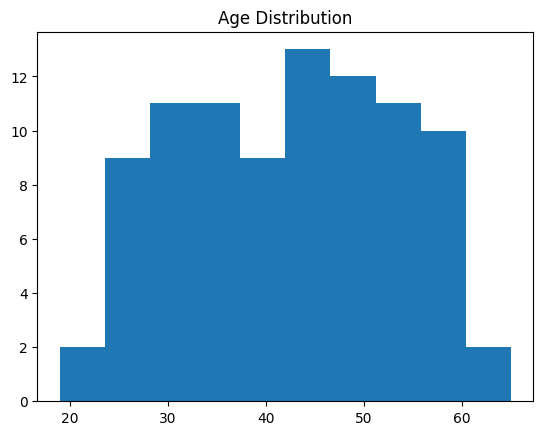

In [1147]:
plt.hist(newdf["Age"])
plt.title('Age Distribution')
plt.show()

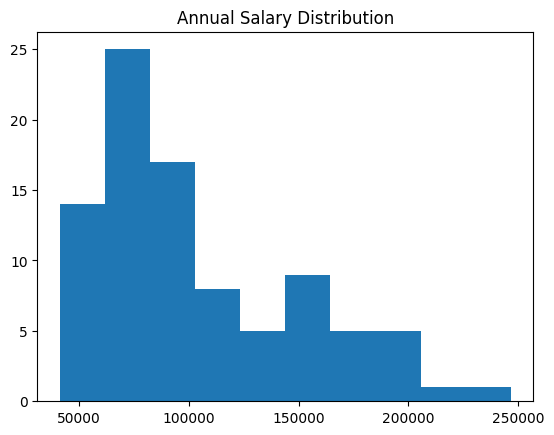

In [1148]:
plt.hist(newdf["Annual Salary"])
plt.title('Annual Salary Distribution')
plt.show()

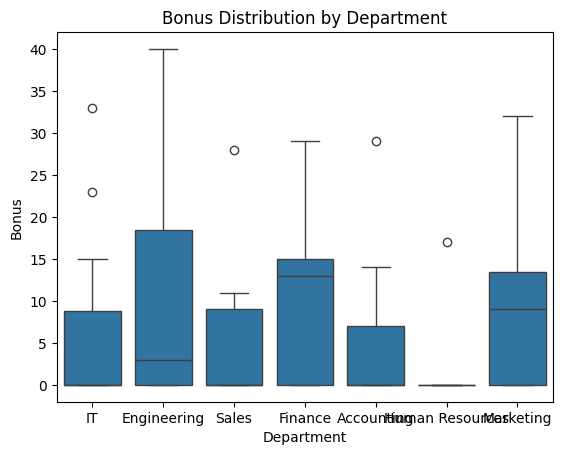

In [1151]:
sns.boxplot(x=newdf["Department"], y=newdf["Bonus %"])
plt.title('Bonus Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Bonus')
plt.show()

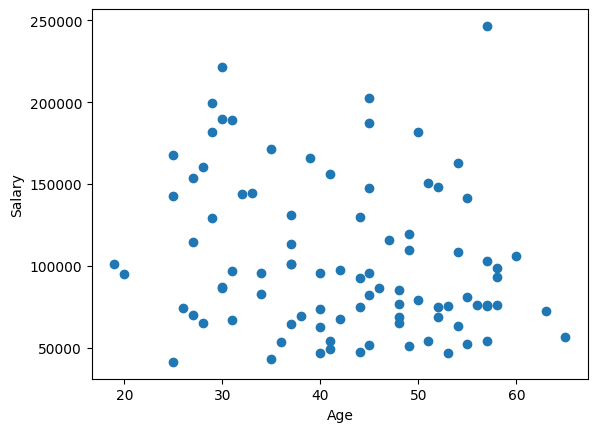

In [1153]:
plt.scatter(newdf["Age"], newdf["Annual Salary"])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

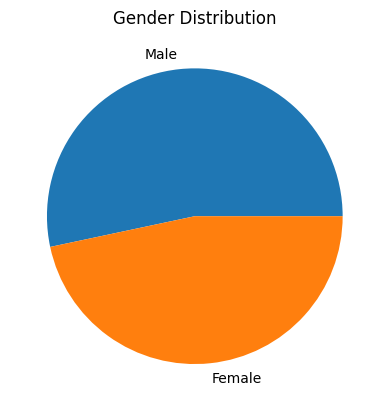

In [1156]:
gender=newdf["Gender"].value_counts()
plt.pie(gender, labels=['Male', 'Female'])
plt.title('Gender Distribution')
plt.show()